In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# makeover
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
df = pd.read_excel("planetary systems with habitability.xlsx", sheet_name="Sheet1")

In [ ]:
# remove the irrelevant planets (no habitability data)
df = df[df["habitability_percent"] != "Not enough data"]
df["habitability_percent"] = df["habitability_percent"].astype(float)

Histogram of Habitability

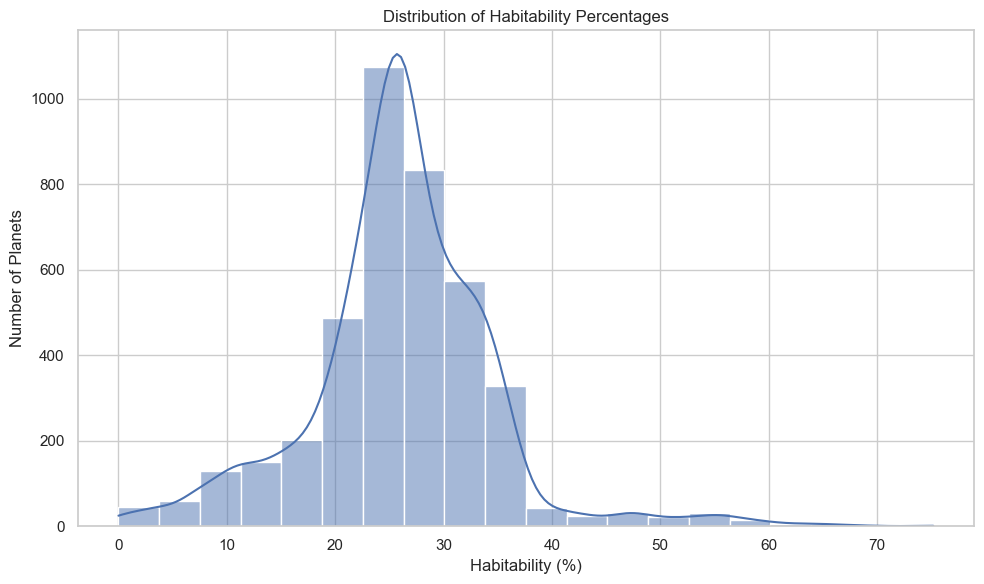

In [6]:
plt.figure()
sns.histplot(df["habitability_percent"], bins=20, kde=True)
plt.title("Distribution of Habitability Percentages")
plt.xlabel("Habitability (%)")
plt.ylabel("Number of Planets")
plt.tight_layout()
plt.show()

Pairplot of Key Features

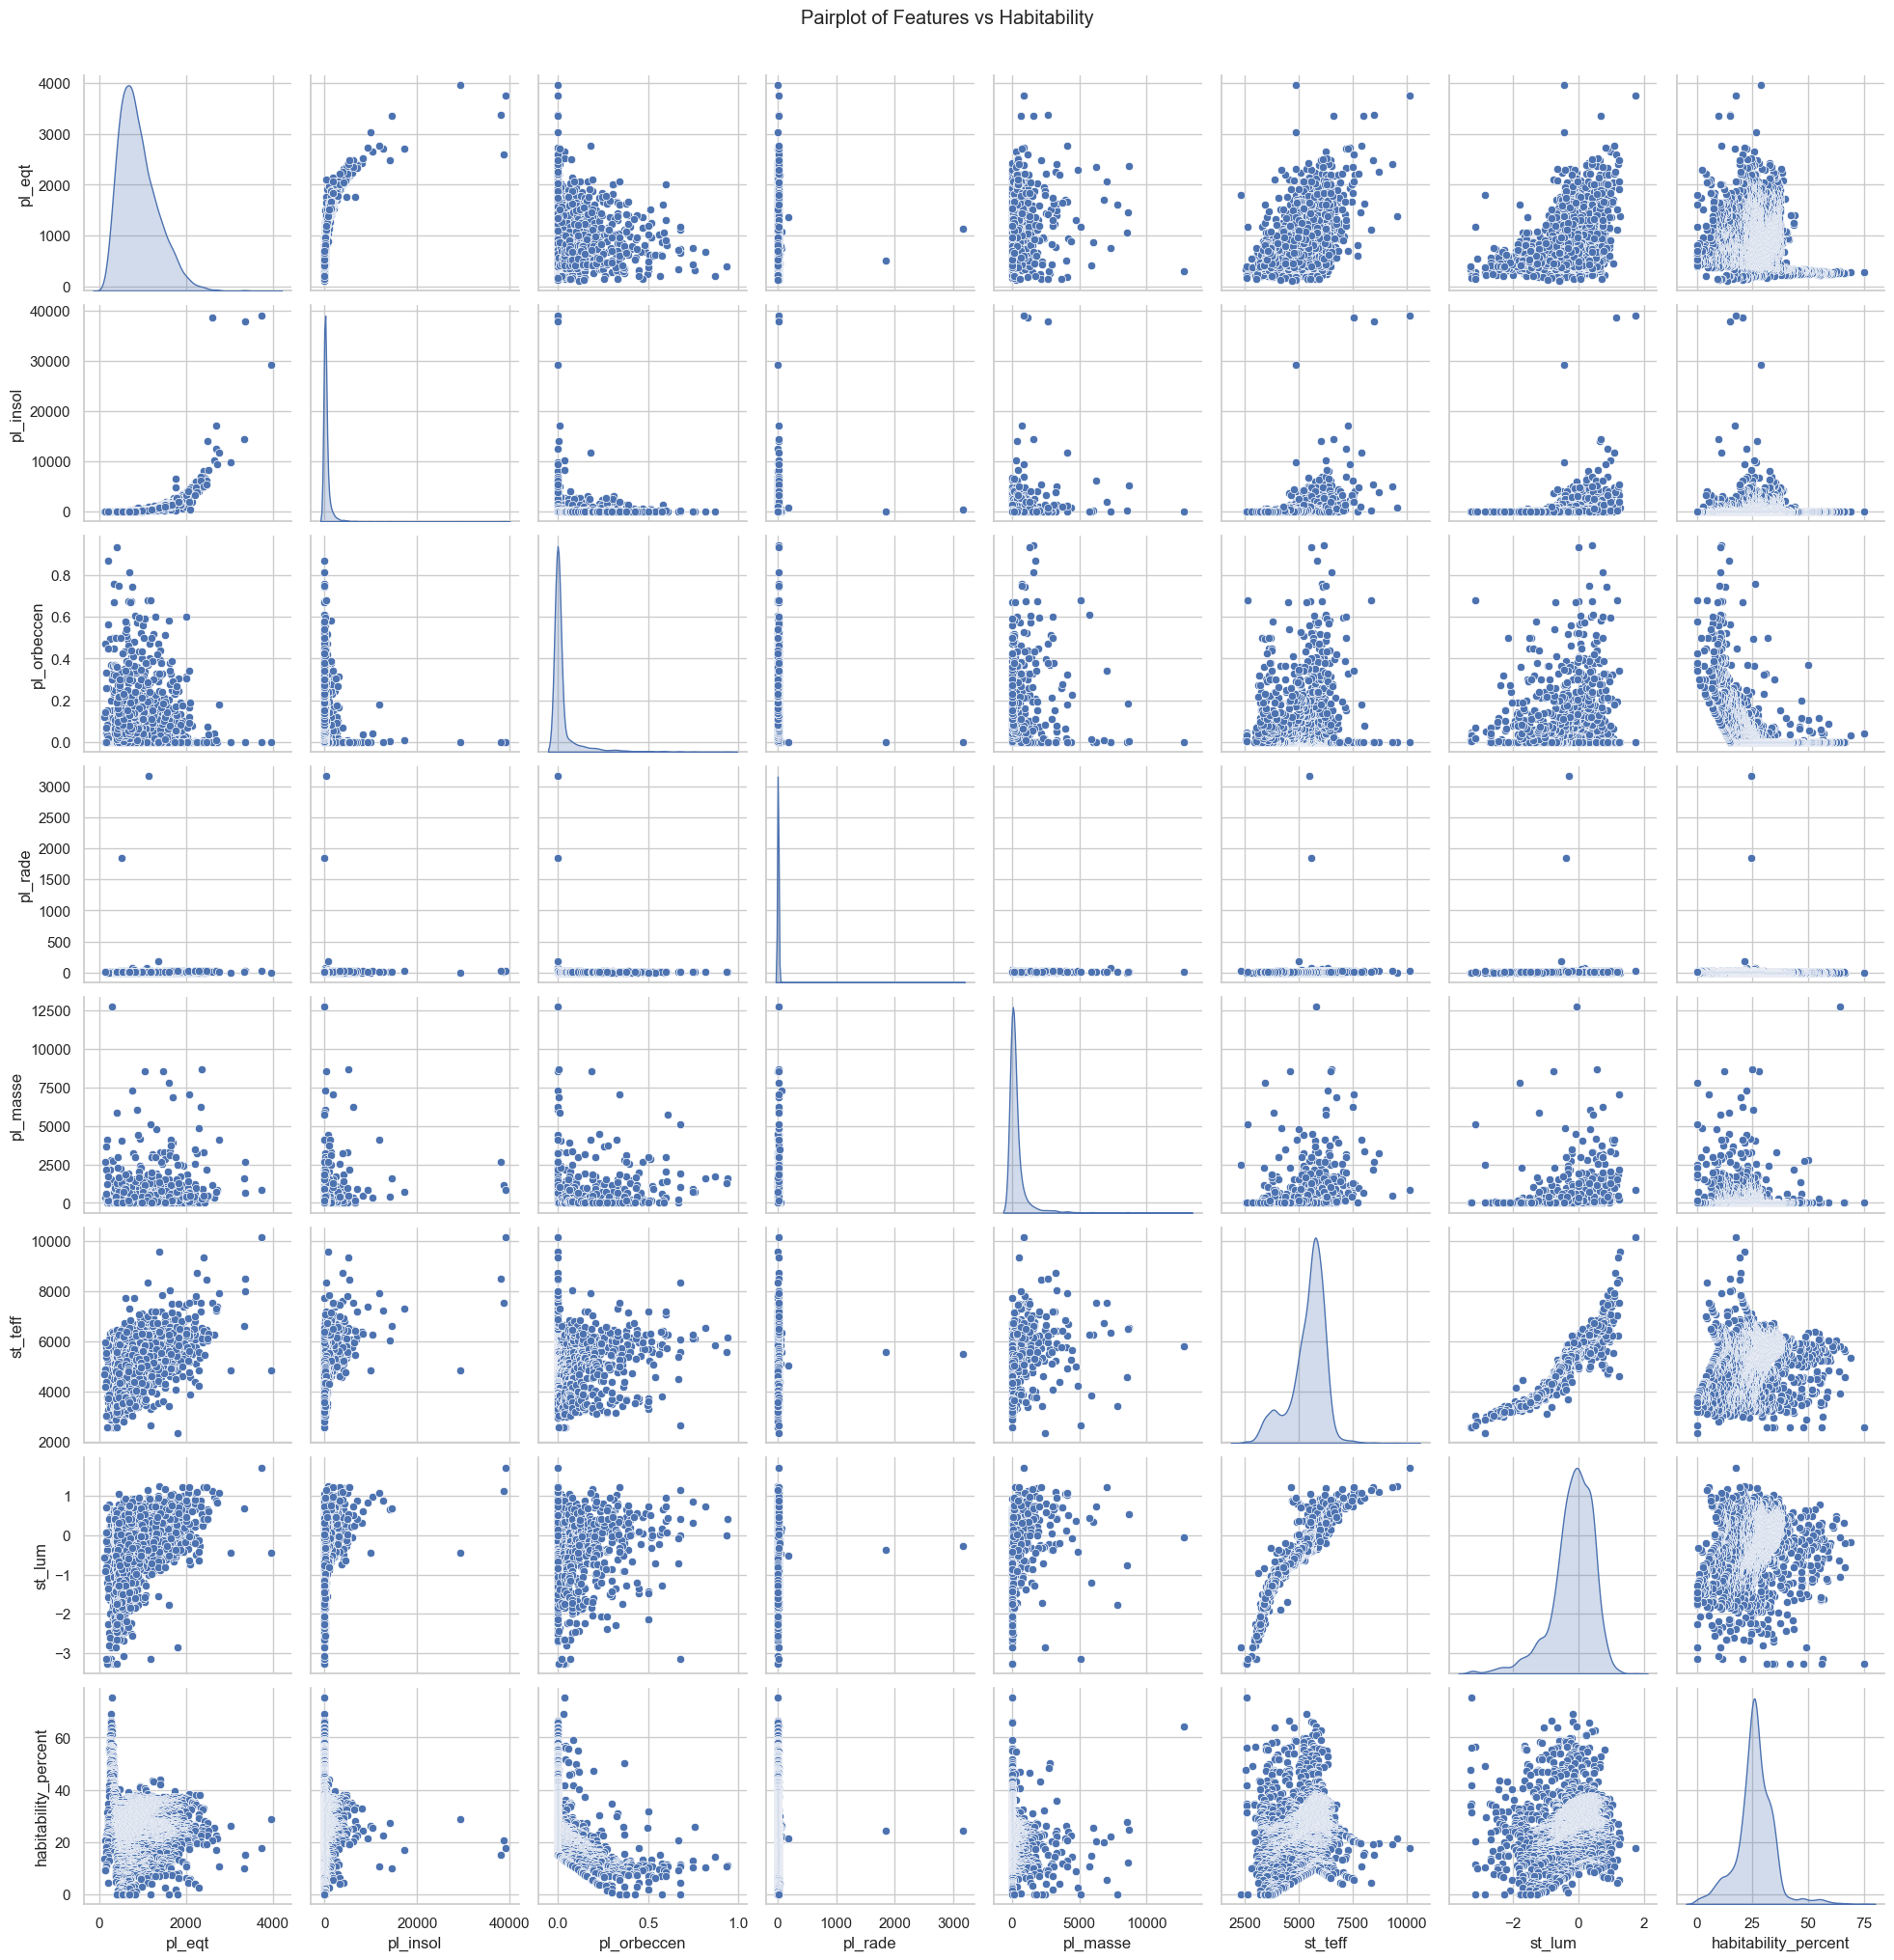

In [7]:
features = ['pl_eqt', 'pl_insol', 'pl_orbeccen', 'pl_rade', 'pl_masse', 'st_teff', 'st_lum', 'habitability_percent']
sns.pairplot(df[features], diag_kind='kde')
plt.suptitle("Pairplot of Features vs Habitability", y=1.02)
plt.show()

Correlation Heatmap

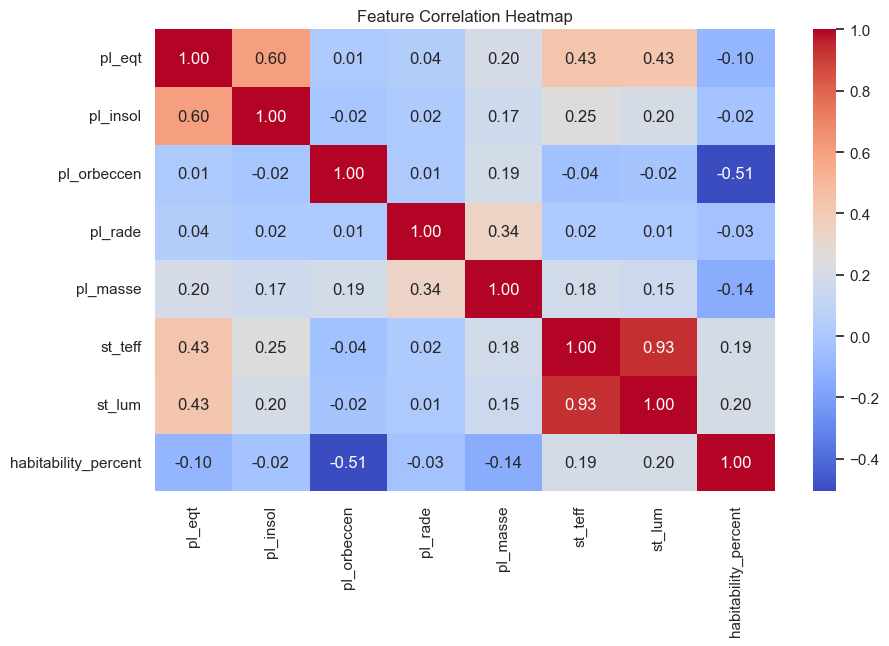

In [8]:
plt.figure()
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Boxplots: Feature vs Habitability

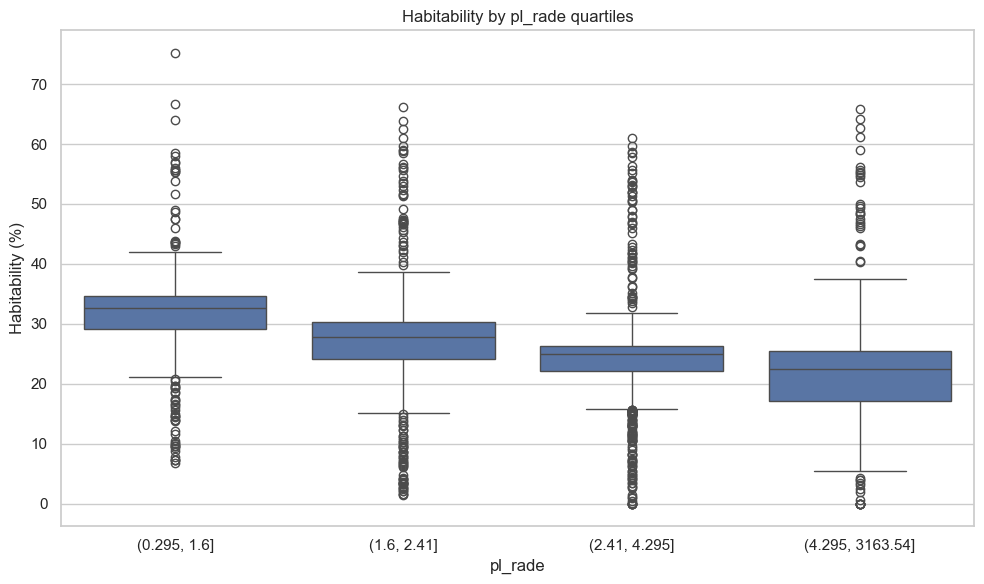

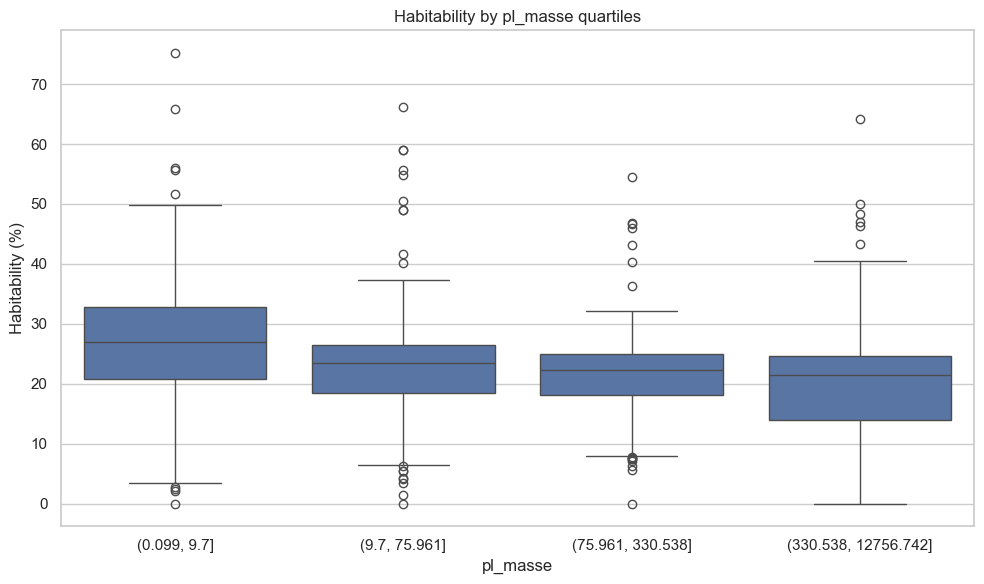

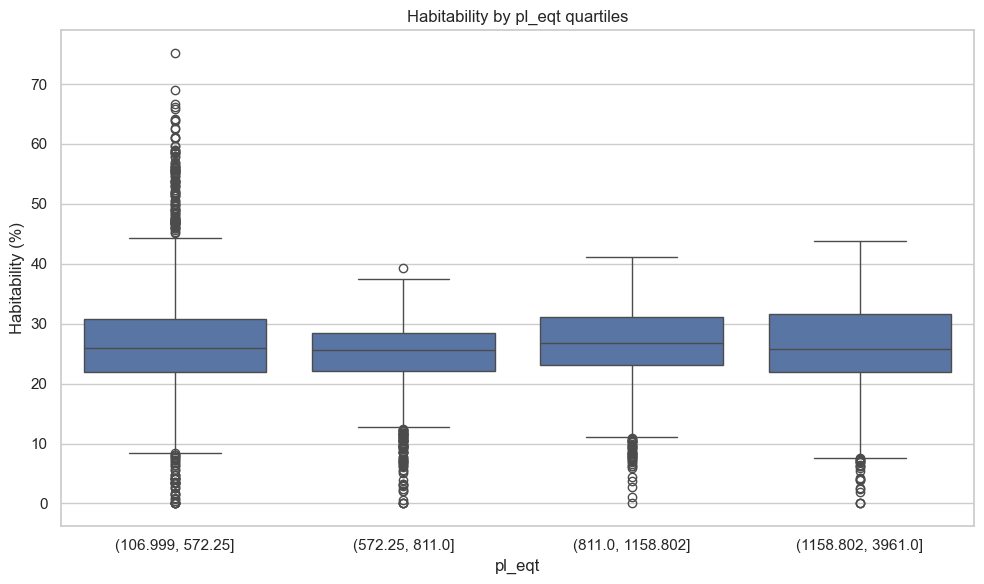

In [9]:
for col in ['pl_rade', 'pl_masse', 'pl_eqt']:
    plt.figure()
    sns.boxplot(x=pd.qcut(df[col], 4), y=df["habitability_percent"])
    plt.title(f"Habitability by {col} quartiles")
    plt.xlabel(col)
    plt.ylabel("Habitability (%)")
    plt.tight_layout()
    plt.show()